# All libraries used

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install zipfile
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install sklearn
# !pip install warnings
# !pip install sklearn
# !pip install statsmodels

# Data download and unzip

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import warnings
warnings.filterwarnings('ignore')

def unzip_file(zip_filepath, dest_dir):
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dest_dir)

unzip_file('/content/drive/MyDrive/Test task to illuma/Amex UK Performance Report.zip','/content/drive/MyDrive/Test task to illuma')
data = pd.read_csv('/content/drive/MyDrive/Test task to illuma/M10208_UK_analytics_202110101143.csv')

In [ ]:
data.tail(5)

,day,line_item_id,split_id,campaign_id,placement_id,pixel_id,imps,clicks,total_conversions,post_view_convs,post_click_convs,media_cost,viewed_imps,view_measured_imps,line_item_name,split_name,pixel_name
544818,2021-10-09,15459641,0,50187724,22851957,0,4,0,0,0,0,0.004597,3,4,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS...,NaN,NaN
544819,2021-10-09,15459641,0,50187724,22851958,0,4,0,0,0,0,0.003019,2,4,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS...,NaN,NaN
544820,2021-10-09,15459641,0,50187724,22855821,0,6,0,0,0,0,0.007150,5,6,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS...,NaN,NaN
544821,2021-10-09,15459641,0,50187724,22880656,0,5,0,0,0,0,0.006198,5,5,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS...,NaN,NaN
544822,2021-10-09,15459641,0,50187724,22893769,0,6,0,0,0,0,0.002038,2,6,UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS...,NaN,NaN


# Data aggregation

In [ ]:
data['line_item_name'].unique()

array(['UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO',
       'UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_GEO POWERWHITELIST',
       'UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_CTX_EN_ GEO SOFT BLACKLIST',
       'UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_AUTO OPT',
       'UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_ILLUMA CUSTOMER PEER',
       'UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_GUARANTEED VIEWABILITY'],
      dtype=object)

In [ ]:
data.loc[data['line_item_name'] == 'UK_ICS_MULTI_XAN_EMEA _Q1_ICS PRO 2020_PRO_DIS_OutDMP_MULTI_STANDARD DISPLAY_AUD_EN_ILLUMA CUSTOMER PEER', 'line_item_id'] = 'Illuma'

In [ ]:
data['line_item_id'].unique()

array([7250327, 9367963, 9367966, 9651867, 'Illuma', 15459641],
      dtype=object)

In [ ]:
data['day'] = pd.to_datetime(data['day'])
#data['cost'] = data['imps']*data['media_cost'] would be correct if that was cost per imp

In [ ]:
grouped_imp = data.groupby('line_item_id')['imps'].sum()
grouped_clicks = data.groupby('line_item_id')['clicks'].sum()
grouped_conv = data.groupby('line_item_id')['total_conversions'].sum()
grouped_cost = data.groupby('line_item_id')['media_cost'].sum()
grouped_start = data.groupby('line_item_id')['day'].min()
grouped_end = data.groupby('line_item_id')['day'].max()
aggregated = pd.DataFrame(grouped_imp)
aggregated['clicks'] = grouped_clicks
aggregated['conv'] = grouped_conv
aggregated['cost'] = grouped_cost
aggregated['start'] = grouped_start
aggregated['end'] = grouped_end

In [ ]:
aggregated

,imps,clicks,conv,cost,start,end
line_item_id,,,,,,
7250327,7684396,1042,985,7691.046694,2021-06-18,2021-10-09
9367963,2667726,723,684,10195.188253,2021-06-18,2021-10-09
9367966,1161330,315,274,3530.963225,2021-06-18,2021-10-09
9651867,9776209,3168,2346,26223.304851,2021-06-18,2021-10-09
15459641,5370562,1332,209,5113.722966,2021-08-02,2021-10-09
Illuma,1906451,458,370,8311.052414,2021-06-21,2021-10-09


**Comment:**
Was not asked to do this one, although was interested in finding whether compaigns were active the whole time.


In [ ]:
def missing_dates(data, line_id):
  data = data.loc[data['line_item_id']==line_id]
  date_range = pd.date_range(start=data['day'].min(), end=data['day'].max())
  missing_dates = date_range.difference(data['day'])
  return missing_dates

pause_compaign = []
number_days_off = []
for i in data['line_item_id'].unique():
  pause_compaign.append(missing_dates(data, i))
  number_days_off.append(len(missing_dates(data, i)))

aggregated['number_days_off'] = number_days_off
aggregated['pause_compaign_days'] = pause_compaign


In [ ]:
aggregated

,imps,clicks,conv,cost,start,end,number_days_off,pause_compaign_days
line_item_id,,,,,,,,
7250327,7684396,1042,985,7691.046694,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20..."
9367963,2667726,723,684,10195.188253,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20..."
9367966,1161330,315,274,3530.963225,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20..."
9651867,9776209,3168,2346,26223.304851,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20..."
15459641,5370562,1332,209,5113.722966,2021-08-02,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20..."
Illuma,1906451,458,370,8311.052414,2021-06-21,2021-10-09,3,"DatetimeIndex(['2021-08-17', '2021-09-14', '20..."


# CPA and Rank position of Illuma's line

In [ ]:
aggregated['CPA'] = aggregated['cost']/aggregated['conv']
aggregated.sort_values('CPA')

,imps,clicks,conv,cost,start,end,number_days_off,pause_compaign_days,CPA
line_item_id,,,,,,,,,
7250327,7684396,1042,985,7691.046694,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",7.808169
9651867,9776209,3168,2346,26223.304851,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",11.177879
9367966,1161330,315,274,3530.963225,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",12.886727
9367963,2667726,723,684,10195.188253,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",14.905246
Illuma,1906451,458,370,8311.052414,2021-06-21,2021-10-09,3,"DatetimeIndex(['2021-08-17', '2021-09-14', '20...",22.462304
15459641,5370562,1332,209,5113.722966,2021-08-02,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",24.467574


 As can be seen Illuma's rank for CPA is 5 when ranking by the lowest cost first

In [ ]:
aggregated['Rank'] = aggregated['CPA'].rank()
aggregated

,imps,clicks,conv,cost,start,end,number_days_off,pause_compaign_days,CPA,Rank
line_item_id,,,,,,,,,,
7250327,7684396,1042,985,7691.046694,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",7.808169,1.0
9367963,2667726,723,684,10195.188253,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",14.905246,4.0
9367966,1161330,315,274,3530.963225,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",12.886727,3.0
9651867,9776209,3168,2346,26223.304851,2021-06-18,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",11.177879,2.0
15459641,5370562,1332,209,5113.722966,2021-08-02,2021-10-09,6,"DatetimeIndex(['2021-07-10', '2021-07-11', '20...",24.467574,6.0
Illuma,1906451,458,370,8311.052414,2021-06-21,2021-10-09,3,"DatetimeIndex(['2021-08-17', '2021-09-14', '20...",22.462304,5.0


# Cumulative CPA change and Plots

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

In [ ]:
def culc_cum_cpa(data):
  data = data.sort_values('day')
  data = data.groupby(['day'])[['total_conversions', 'media_cost']].sum().reset_index()
  data['cum_cost'] = data['media_cost'].cumsum()
  data['cum_conv'] = data['total_conversions'].cumsum()
  data['CPA'] = data['cum_cost'] / data['cum_conv'].replace(0, np.nan)
  data['CPA'].fillna(method='ffill', inplace=True)
  return data

def plot_cum_cpa(data, i, ax):
    sns.lineplot(x='day', y='CPA', data=data, ax=ax, color='darkblue', linewidth=2.5)
    ax.set(xlabel='Date', ylabel='Cumulative CPA')
    ax.set_title(f'Cumulative CPA over Time for {i} line', fontsize=15)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.xticks(rotation=30)

In [ ]:
def plot_cum_cpa_multiplot(data):

    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(12, 8))

    for i in data['line_item_id'].unique():
        dataframe = culc_cum_cpa(data.loc[data['line_item_id']==i])
        sns.lineplot(x='day', y='CPA', data=dataframe, ax=ax, label=i, linewidth=1.5)


    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Cumulative CPA', fontsize=12)
    ax.set_title('Cumulative CPA over Time', fontsize=20)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    plt.xticks(rotation=30)
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    plt.setp(ax.get_legend().get_texts(), fontsize=12)
    plt.legend()
    plt.show()

In [ ]:
cum = culc_cum_cpa(data.loc[data['line_item_id']=='Illuma'])

In [ ]:
cum.head(5)

,day,total_conversions,media_cost,cum_cost,cum_conv,CPA
0,2021-06-21,0,141.553275,141.553275,0,NaN
1,2021-06-22,0,144.189662,285.742937,0,NaN
2,2021-06-23,0,142.907646,428.650583,0,NaN
3,2021-06-24,0,142.253263,570.903846,0,NaN
4,2021-06-25,2,140.548620,711.452466,2,355.726233


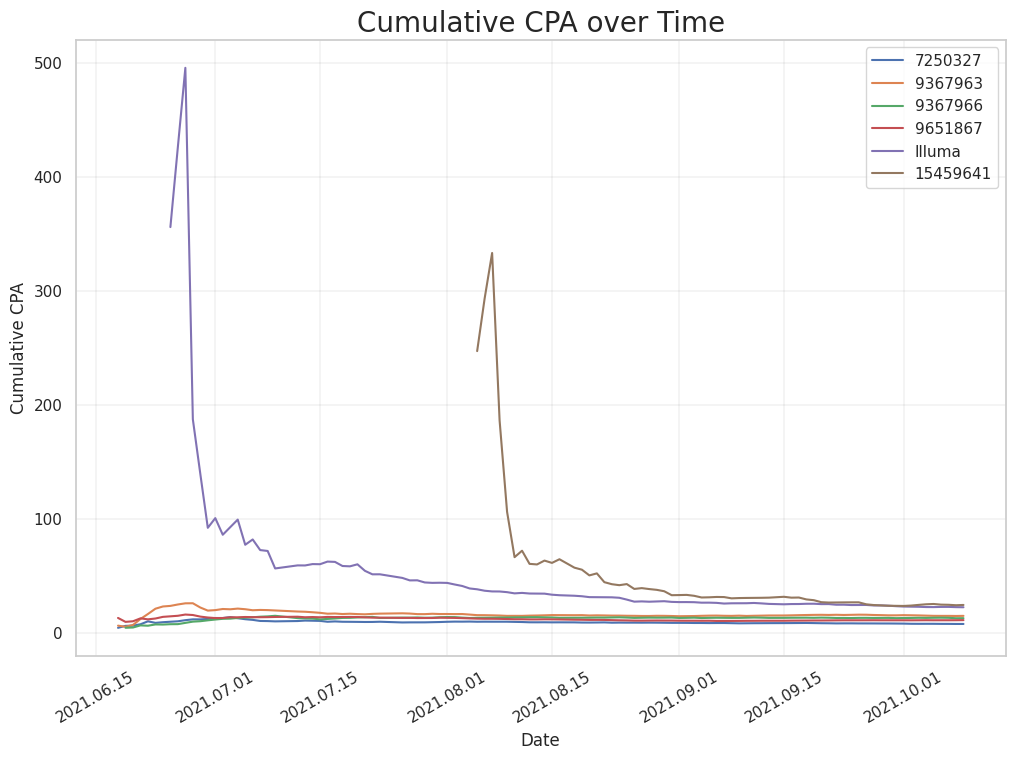

In [ ]:
plot_cum_cpa_multiplot(data)

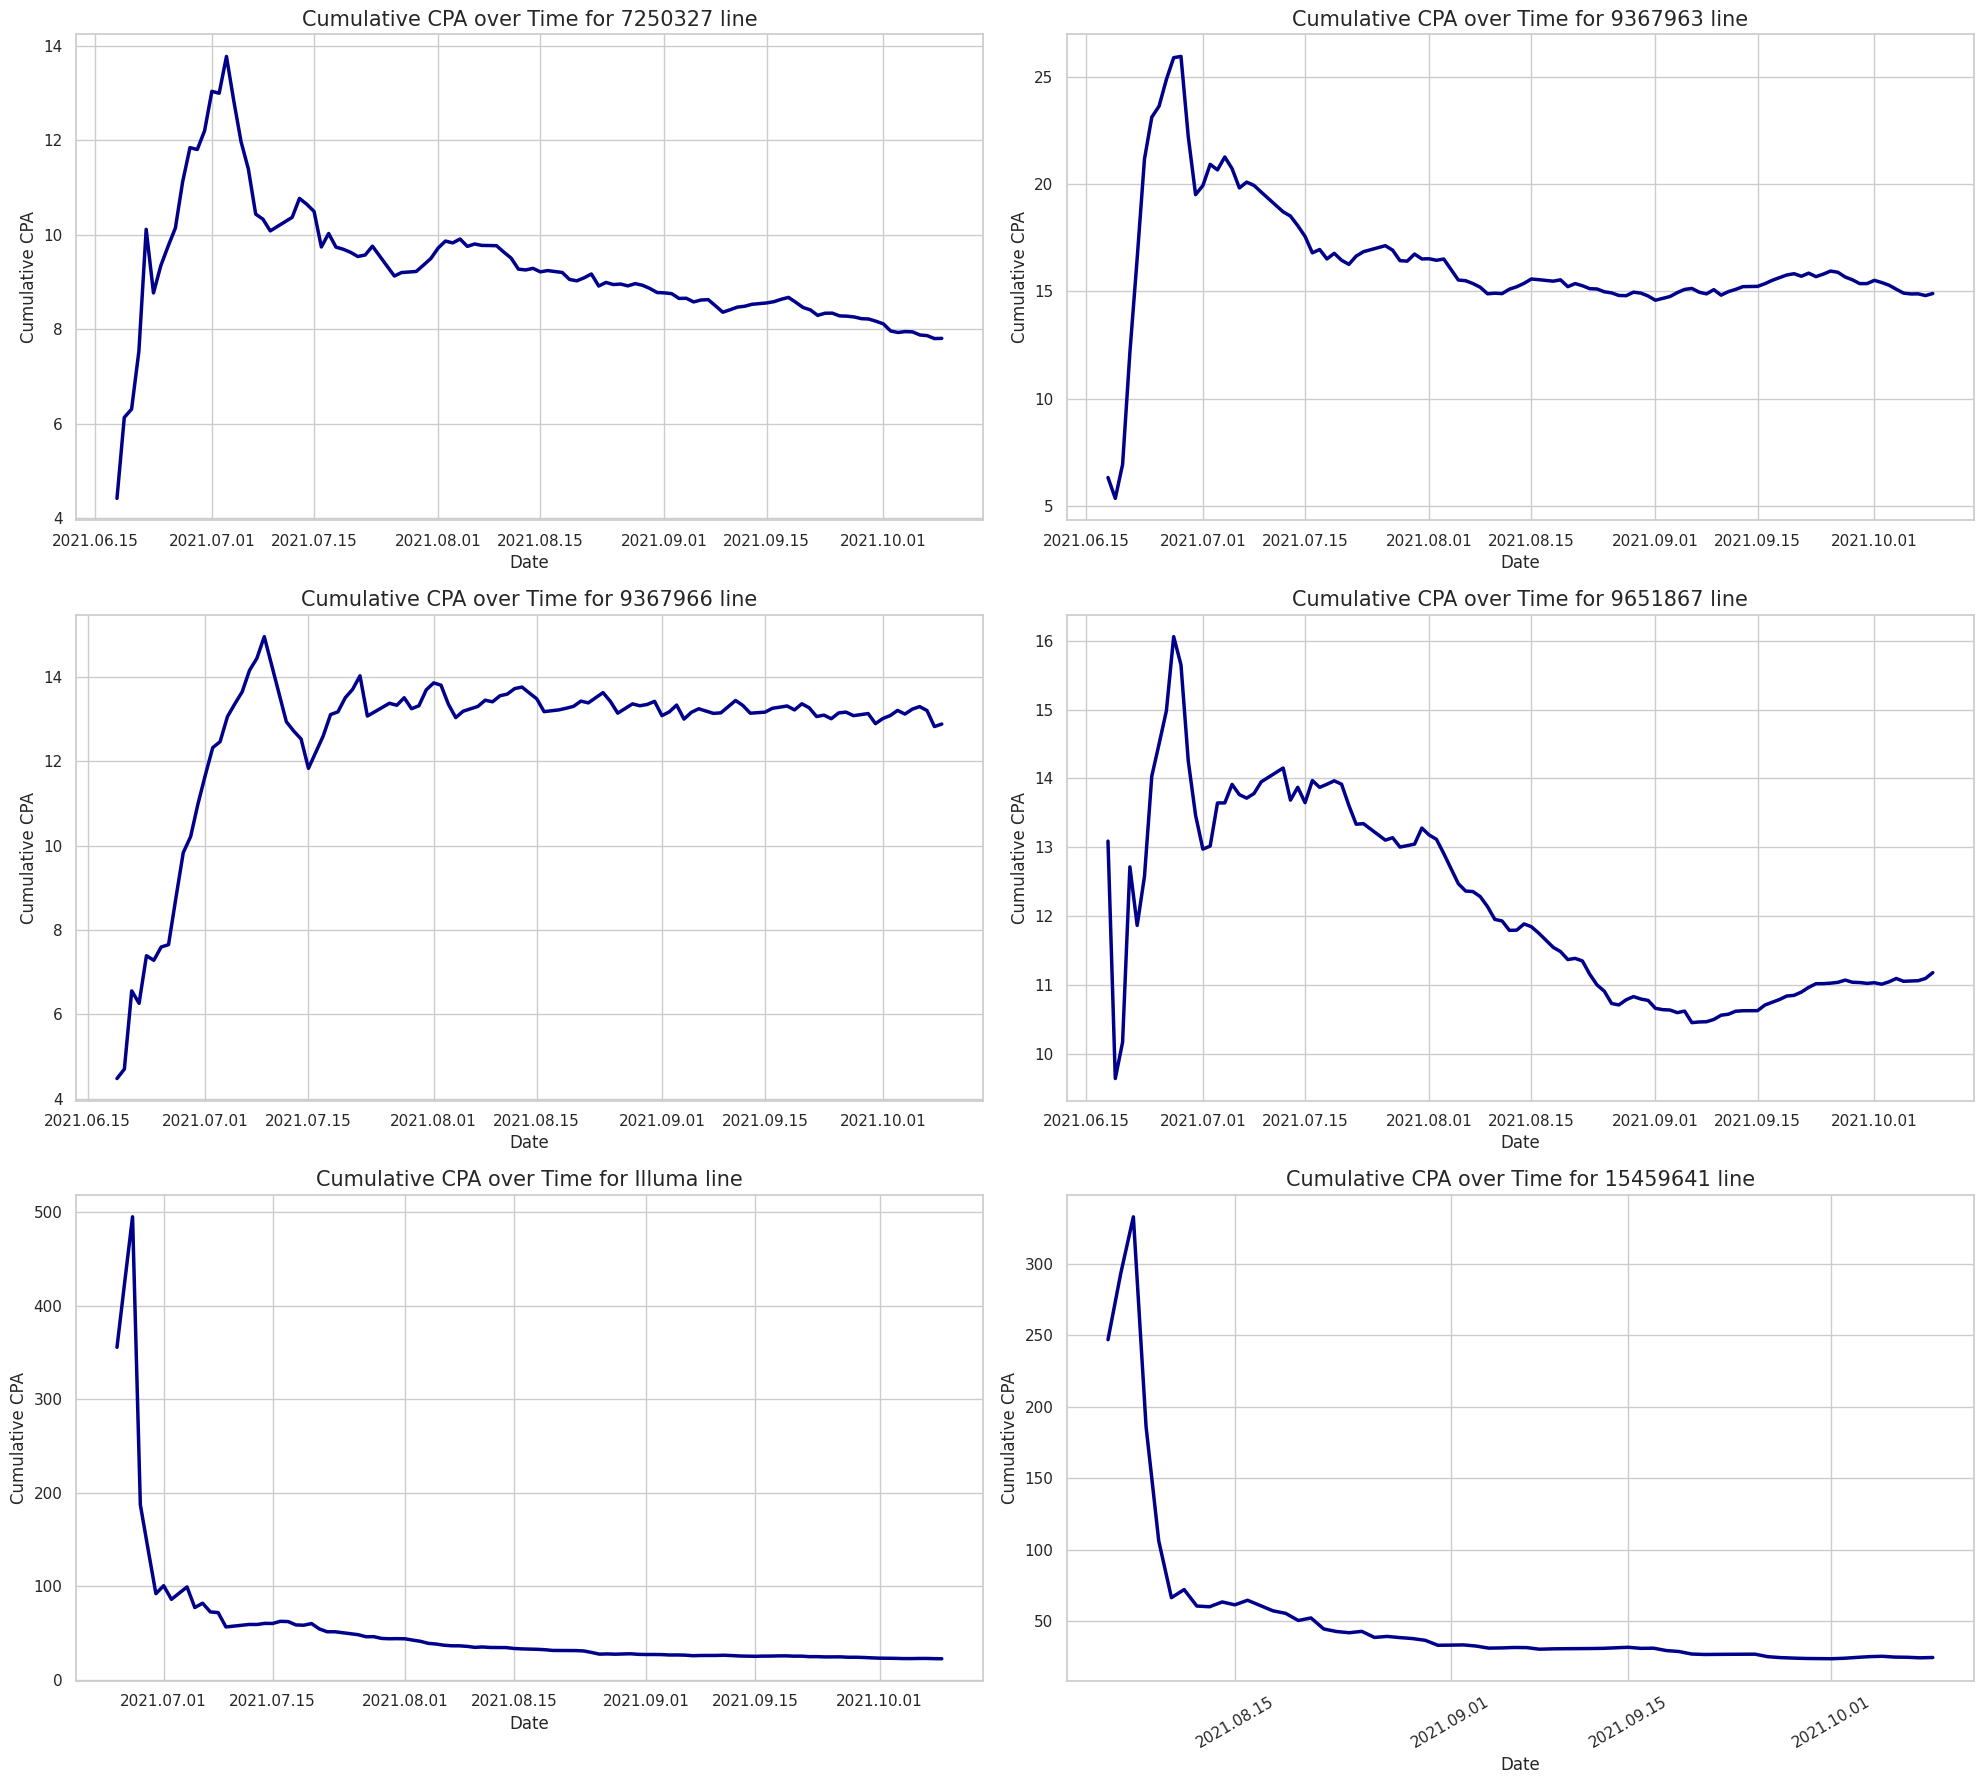

In [ ]:
unique_line_item_ids = data['line_item_id'].unique()
n = len(unique_line_item_ids)

fig, axs = plt.subplots(n//2, 2, figsize=(20, 6*n//2))

for i, line_item_id in enumerate(unique_line_item_ids):
    cum = culc_cum_cpa(data.loc[data['line_item_id']==line_item_id])
    plot_cum_cpa(cum, line_item_id, axs[i//2][i%2])

plt.tight_layout()
plt.show()

In [ ]:
cum = culc_cum_cpa(data.loc[data['line_item_id']=='Illuma'])
cum.head(6)

,day,total_conversions,media_cost,cum_cost,cum_conv,CPA
0,2021-06-21,0,141.553275,141.553275,0,NaN
1,2021-06-22,0,144.189662,285.742937,0,NaN
2,2021-06-23,0,142.907646,428.650583,0,NaN
3,2021-06-24,0,142.253263,570.903846,0,NaN
4,2021-06-25,2,140.548620,711.452466,2,355.726233
5,2021-06-26,0,140.728339,852.180805,2,426.090402


# Mathematical function

##### For modelling illuma's line performance one may choose several approaches. Here two are suggested.


1.   Logarithmic or exponential decay functions


2.   Piecewise function consisting of linear segments

For the general representation of data behaviour one may suggest to use first approach, while second one is expected to show better results in predicting further behaviour of cumulative CPA


### 1 Logarithmic or Exponential decay models


$$f(x)=A⋅log(C+x)+B$$


Over Exponential $$f(x)=A⋅e^{Bx+D}+C$$

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def func_log(x, A, C, B):
    return A * np.log(C + x) + B

y_data = np.array(cum.CPA.values[4:]) ## first 4 days are not used due to lack of conversions
x_data = pd.to_datetime(cum.day[4:])  ## first 4 days are not used due to lack of conversions
x_data = (x_data - pd.Timestamp("2021-01-01")) // pd.Timedelta("1 days")
popt, pcov = curve_fit(func_log, x_data, y_data, p0=[-12, 1, 50], method='trf')
A_opt, C_opt, B_opt = popt

print(f"A = {A_opt:.2f}, C = {C_opt:.2f}, B = {B_opt:.2f}")

A = -52.65, C = -174.92, B = 245.27


Here one may notice that coding of time took a place and model takes as input the time in days since 1st of January 2021.

In [ ]:
def func_exp(x, a, b, c, d):
    return a * np.exp(b * x + d) + c

popt, pcov = curve_fit(func_exp, x_data, y_data, p0=[10,-0.5,10,100], method='trf')
a_opt, b_opt, c_opt, d_opt = popt
print(f"a = {a_opt:.2f}, b = {b_opt:.2f}, c = {c_opt:.2f}, d = {d_opt:.2f}")

a = 124.40, b = -0.23, c = 33.15, d = 41.38


With rounding up to 2 digits the resulting models are:
$$f(x)=-52.65⋅log(-174.92+x)+245.27$$
$$f(x)=124.4⋅e^{-0.23x+41.38}+33.15$$

**Lets now compare it to simplest linear regression model of $f(x)= \beta_0+\beta_1⋅x$**

In [ ]:
from sklearn.metrics import mean_squared_error

def func(x, b_0, b_1):
    return b_0 + b_1*x

popt, pcov = curve_fit(func, x_data, y_data)
b_0_opt, b_1_opt = popt

print(f"Optimized parameters of linear regression are \nb_0 = {b_0_opt:.2f}, b_1 = {b_1_opt:.2f}")
y_pred = func(x_data, b_0_opt, b_1_opt)
mse = mean_squared_error(y_data, y_pred)
print(f"MSE of linear model = {mse:.2f}")
y_pred_log = func_log(x_data, A_opt, C_opt, B_opt)
mse = mean_squared_error(y_data, y_pred_log)
print(f"MSE of logarithmic model = {mse:.2f}")
y_pred_exp = func_exp(x_data, a_opt, b_opt, c_opt, d_opt)
mse = mean_squared_error(y_data, y_pred_exp)
print(f"MSE of exponential model = {mse:.2f}")

Optimized parameters of linear regression are 
b_0 = 338.33, b_1 = -1.25
MSE of linear model = 3513.57
MSE of logarithmic model = 1583.82
MSE of exponential model = 768.87


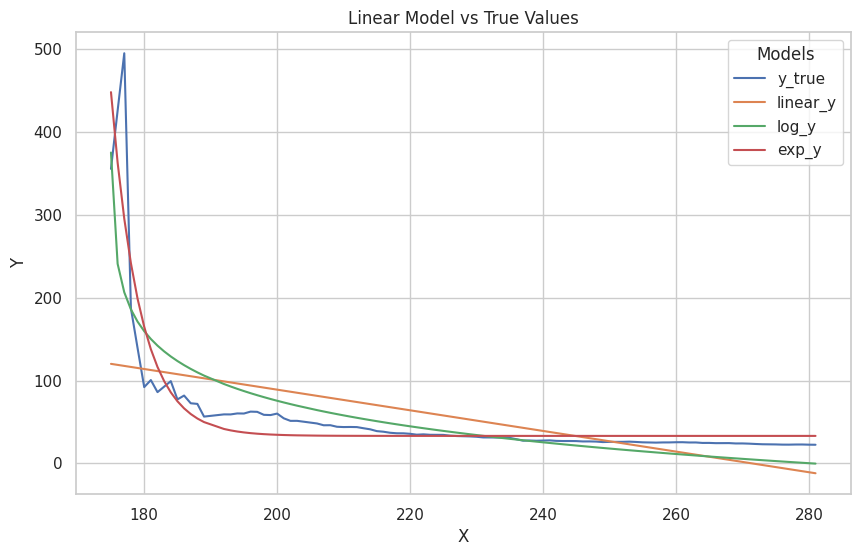

In [ ]:
df = pd.DataFrame({'x': x_data, 'y_true': y_data, 'linear_y': y_pred, 'log_y':y_pred_log, "exp_y":y_pred_exp})
df_melt = df.melt('x', var_name='Models', value_name='y')
plt.figure(figsize=(10, 6))
sns.lineplot(x='x', y='y', hue='Models', data=df_melt)
plt.title('Linear Model vs True Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here it is possible to see that MSE of logarythmic model is significantly lower (more than 2 times), than linear model, while exponential model showed even less error therefore exponential model does a better job at explaining the <ins>**known**</ins> part of the data than linear and logarithmic model.

### 2 Piecewise model
In this case piecewise function consists of linear segments  

The function is defined as:

$$
f(x) =
\begin{cases}
k1 \cdot x + y0 - k1 \cdot x0 & \text{if } x < x0 \\
k2 \cdot x + y0 - k2 \cdot x0 & \text{otherwise}
\end{cases}
$$

Where $x0$, $y0$, $k1$, and $k2$ are parameters. The function changes based on whether $x$ is less than $x0$ or not.

In [ ]:
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

popt, pcov = curve_fit(piecewise_linear, x_data.values, y_data, p0=[190,1,1,1])
x0_opt, y0_opt, k1_opt, k2_opt = popt

print(f"x0 = {x0_opt:.2f}, y0 = {y0_opt:.2f}, k1 = {k1_opt:.2f}, k2 = {k2_opt:.2f}")
y_pred = piecewise_linear(x_data.values, x0_opt, y0_opt, k1_opt, k2_opt)
mse = mean_squared_error(y_data, y_pred)
print(f"MSE of piecewise model = {mse:.2f}")

x0 = 180.53, y0 = 67.15, k1 = -71.05, k2 = -0.56
MSE of piecewise model = 558.47


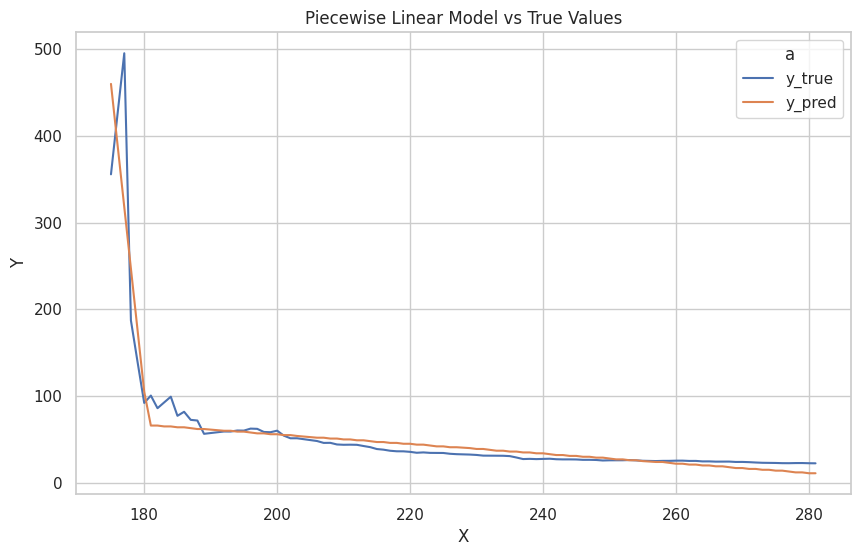

In [ ]:
y_pred = piecewise_linear(x_data.values, x0_opt, y0_opt, k1_opt, k2_opt)
df = pd.DataFrame({'x': x_data, 'y_true': y_data, 'y_pred': y_pred})
df_melt = df.melt('x', var_name='a', value_name='y')
plt.figure(figsize=(10, 6))
sns.lineplot(x='x', y='y', hue='a', data=df_melt)
plt.title('Piecewise Linear Model vs True Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

As can be seen piecewise model with two line segments showed the smallest value of MSE and therefore is chosen to represent the known data.
Further increasing the number of segments would decrease MSE, although generalisation power of the model would decreese as well.

Final model is:

$$f(x) = \begin{cases}
-71.05 \cdot x + 67.15 - (-71.05) \cdot 180.53 & \text{if } x < 180.53 \\
-0.56 \cdot x + 67.15 - (-0.56) \cdot 180.53 & \text{otherwise}
\end{cases}
$$

This means that if $x$ is less than $180.53$, the first equation is used, otherwise the second equation is used.

# Prediction of Illuma line's performance at the end of October 2021

Here performance of campaign can be highlighted by cost of the campaign, number of acquisitions and cost per acquisition.

The period for prediction is 10.10.2021 to 31.10.2021

In order to test predictive models test set is defined as the last 3 known weeks 19.09.2021 to 09.10.2021

In [ ]:
pd.Timedelta(days=x_data.values[-21])+pd.Timestamp("2021-01-01")

Timestamp('2021-09-19 00:00:00')

In [ ]:
cum = culc_cum_cpa(data.loc[data['line_item_id']=='Illuma'])

In [ ]:
cum.index = pd.to_datetime(cum['day'], format='%Y-%m-%d')
cum = cum.drop(columns=['day','total_conversions', 'media_cost'])
cum.head()

,cum_cost,cum_conv,CPA
day,,,
2021-06-21,141.553275,0,NaN
2021-06-22,285.742937,0,NaN
2021-06-23,428.650583,0,NaN
2021-06-24,570.903846,0,NaN
2021-06-25,711.452466,2,355.726233


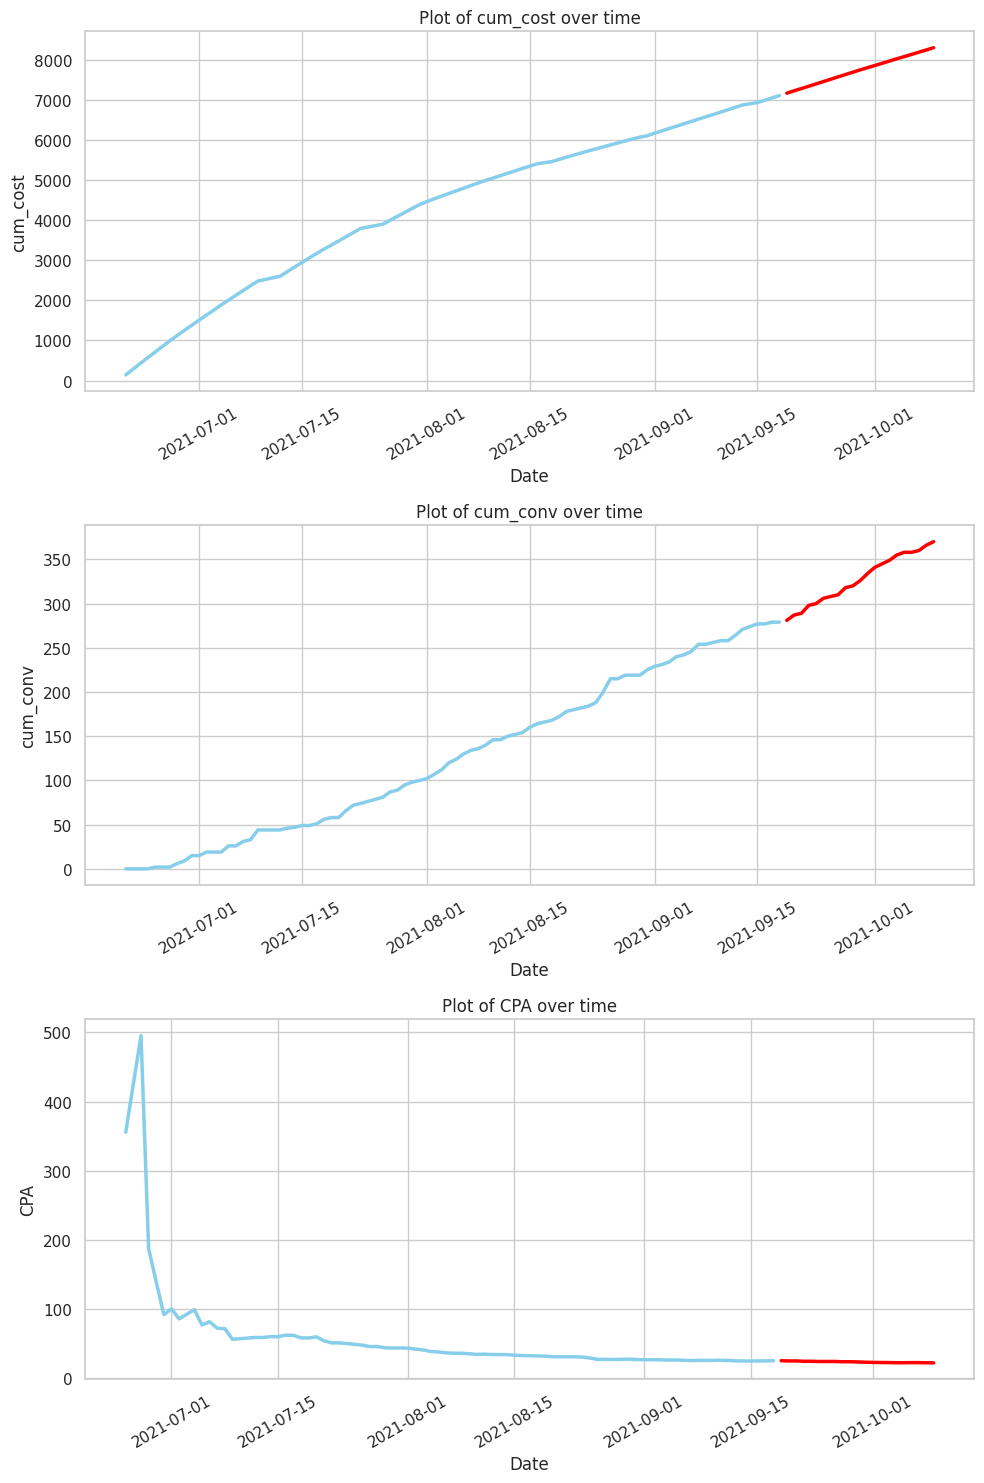

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(len(cum.columns.values), figsize=(10, 15))

for i, column in enumerate(cum.columns.values):
    sns.lineplot(x=cum.index[:-21], y=cum[column][:-21], ax=axs[i], color='skyblue', linewidth=2.5)
    sns.lineplot(x=cum.index[-21:], y=cum[column][-21:], ax=axs[i], color='red', linewidth=2.5)
    axs[i].set_ylabel(column)
    axs[i].set_xlabel('Date')
    axs[i].set_title(f'Plot of {column} over time')

    for item in axs[i].get_xticklabels():
        item.set_rotation(30)

plt.tight_layout()
plt.show()

## Cost predictor

In this section for predicting the cost of the campaign basic ARIMA $(1,1,1)$ showed the best results on RMSE and MAE metrics. Further finetuning of the model is expected to make results even better, although overfitting cannot be spotted on the single test set, therefore basic model is chosen to be trained on the whole data and predict the cost of the campaign.

In [ ]:
train = cum[cum.index < pd.to_datetime("2021-09-09", format='%Y-%m-%d')]
test = cum[cum.index >= pd.to_datetime("2021-09-09", format='%Y-%m-%d')]
test


,cum_cost,cum_conv,CPA
day,,,
2021-09-09,6643.469077,256,25.951051
2021-09-10,6702.112942,258,25.977182
2021-09-11,6762.053235,258,26.209509
2021-09-12,6822.035636,264,25.841044
2021-09-13,6880.655803,271,25.389874
2021-09-15,6939.009613,277,25.050576
2021-09-16,6997.549281,277,25.261911
2021-09-17,7056.357126,279,25.291603
2021-09-18,7115.975249,279,25.505288


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


def test_model(cum, target):
    cum = pd.DataFrame(cum[target])
    train = cum[cum.index < pd.to_datetime("2021-09-09", format='%Y-%m-%d')]
    test = cum[cum.index >= pd.to_datetime("2021-09-09", format='%Y-%m-%d')]
    train_index = (train.index - train.index[0]).days.values.reshape(-1, 1)
    test_index = (test.index - train.index[0]).days.values.reshape(-1, 1)
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso Regression": Lasso(),
        "Bayesian Linear Regression": BayesianRidge(),
        "SVM": SVR(),
        "Gradient Boosting Regression": GradientBoostingRegressor(),
        "ARIMA": ARIMA(train[target], order=(1,1,1)),
        "SARIMA": SARIMAX(train[target], order=(1,1,1), seasonal_order=(1,1,1,12))
    }

    fig, axs = plt.subplots(np.ceil(len(models) / 2).astype(int), 2, figsize=(20, 6 * np.ceil(len(models) / 2)))

    for ax, (name, model) in zip(axs.flatten(), models.items()):
        print(name)
        if name in ["ARIMA", "SARIMA"]:
            model_fit = model.fit()
            predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
        else:
            model.fit(train_index, train[target])
            predictions = model.predict(test_index)

        rmse = np.sqrt(mean_squared_error(test[target], predictions))
        mae = mean_absolute_error(test[target], predictions)

        print(f"{name} RMSE: {rmse:.2f}")
        print(f"{name} MAE: {mae:.2f}")

        ax.plot(train.index, train[target], color='blue', label='Training Data')
        ax.plot(test.index, test[target], color='green', marker='o', label='Actual Test Data')
        ax.plot(test.index, predictions, color='red', label='Predicted Test Data')
        ax.set_title(f'{name} Predictions')
        ax.set_xlabel('Date')
        ax.set_ylabel('Value')
        ax.legend()

    plt.tight_layout()
    plt.show()

Linear Regression
Linear Regression RMSE: 861.76
Linear Regression MAE: 839.13
Lasso Regression
Lasso Regression RMSE: 861.66
Lasso Regression MAE: 839.03
Bayesian Linear Regression
Bayesian Linear Regression RMSE: 860.08
Bayesian Linear Regression MAE: 837.46
SVM
SVM RMSE: 3056.95
SVM MAE: 3015.16
Gradient Boosting Regression
Gradient Boosting Regression RMSE: 1032.24
Gradient Boosting Regression MAE: 903.97
ARIMA
ARIMA RMSE: 11.66
ARIMA MAE: 10.34
SARIMA
SARIMA RMSE: 57.44
SARIMA MAE: 46.76


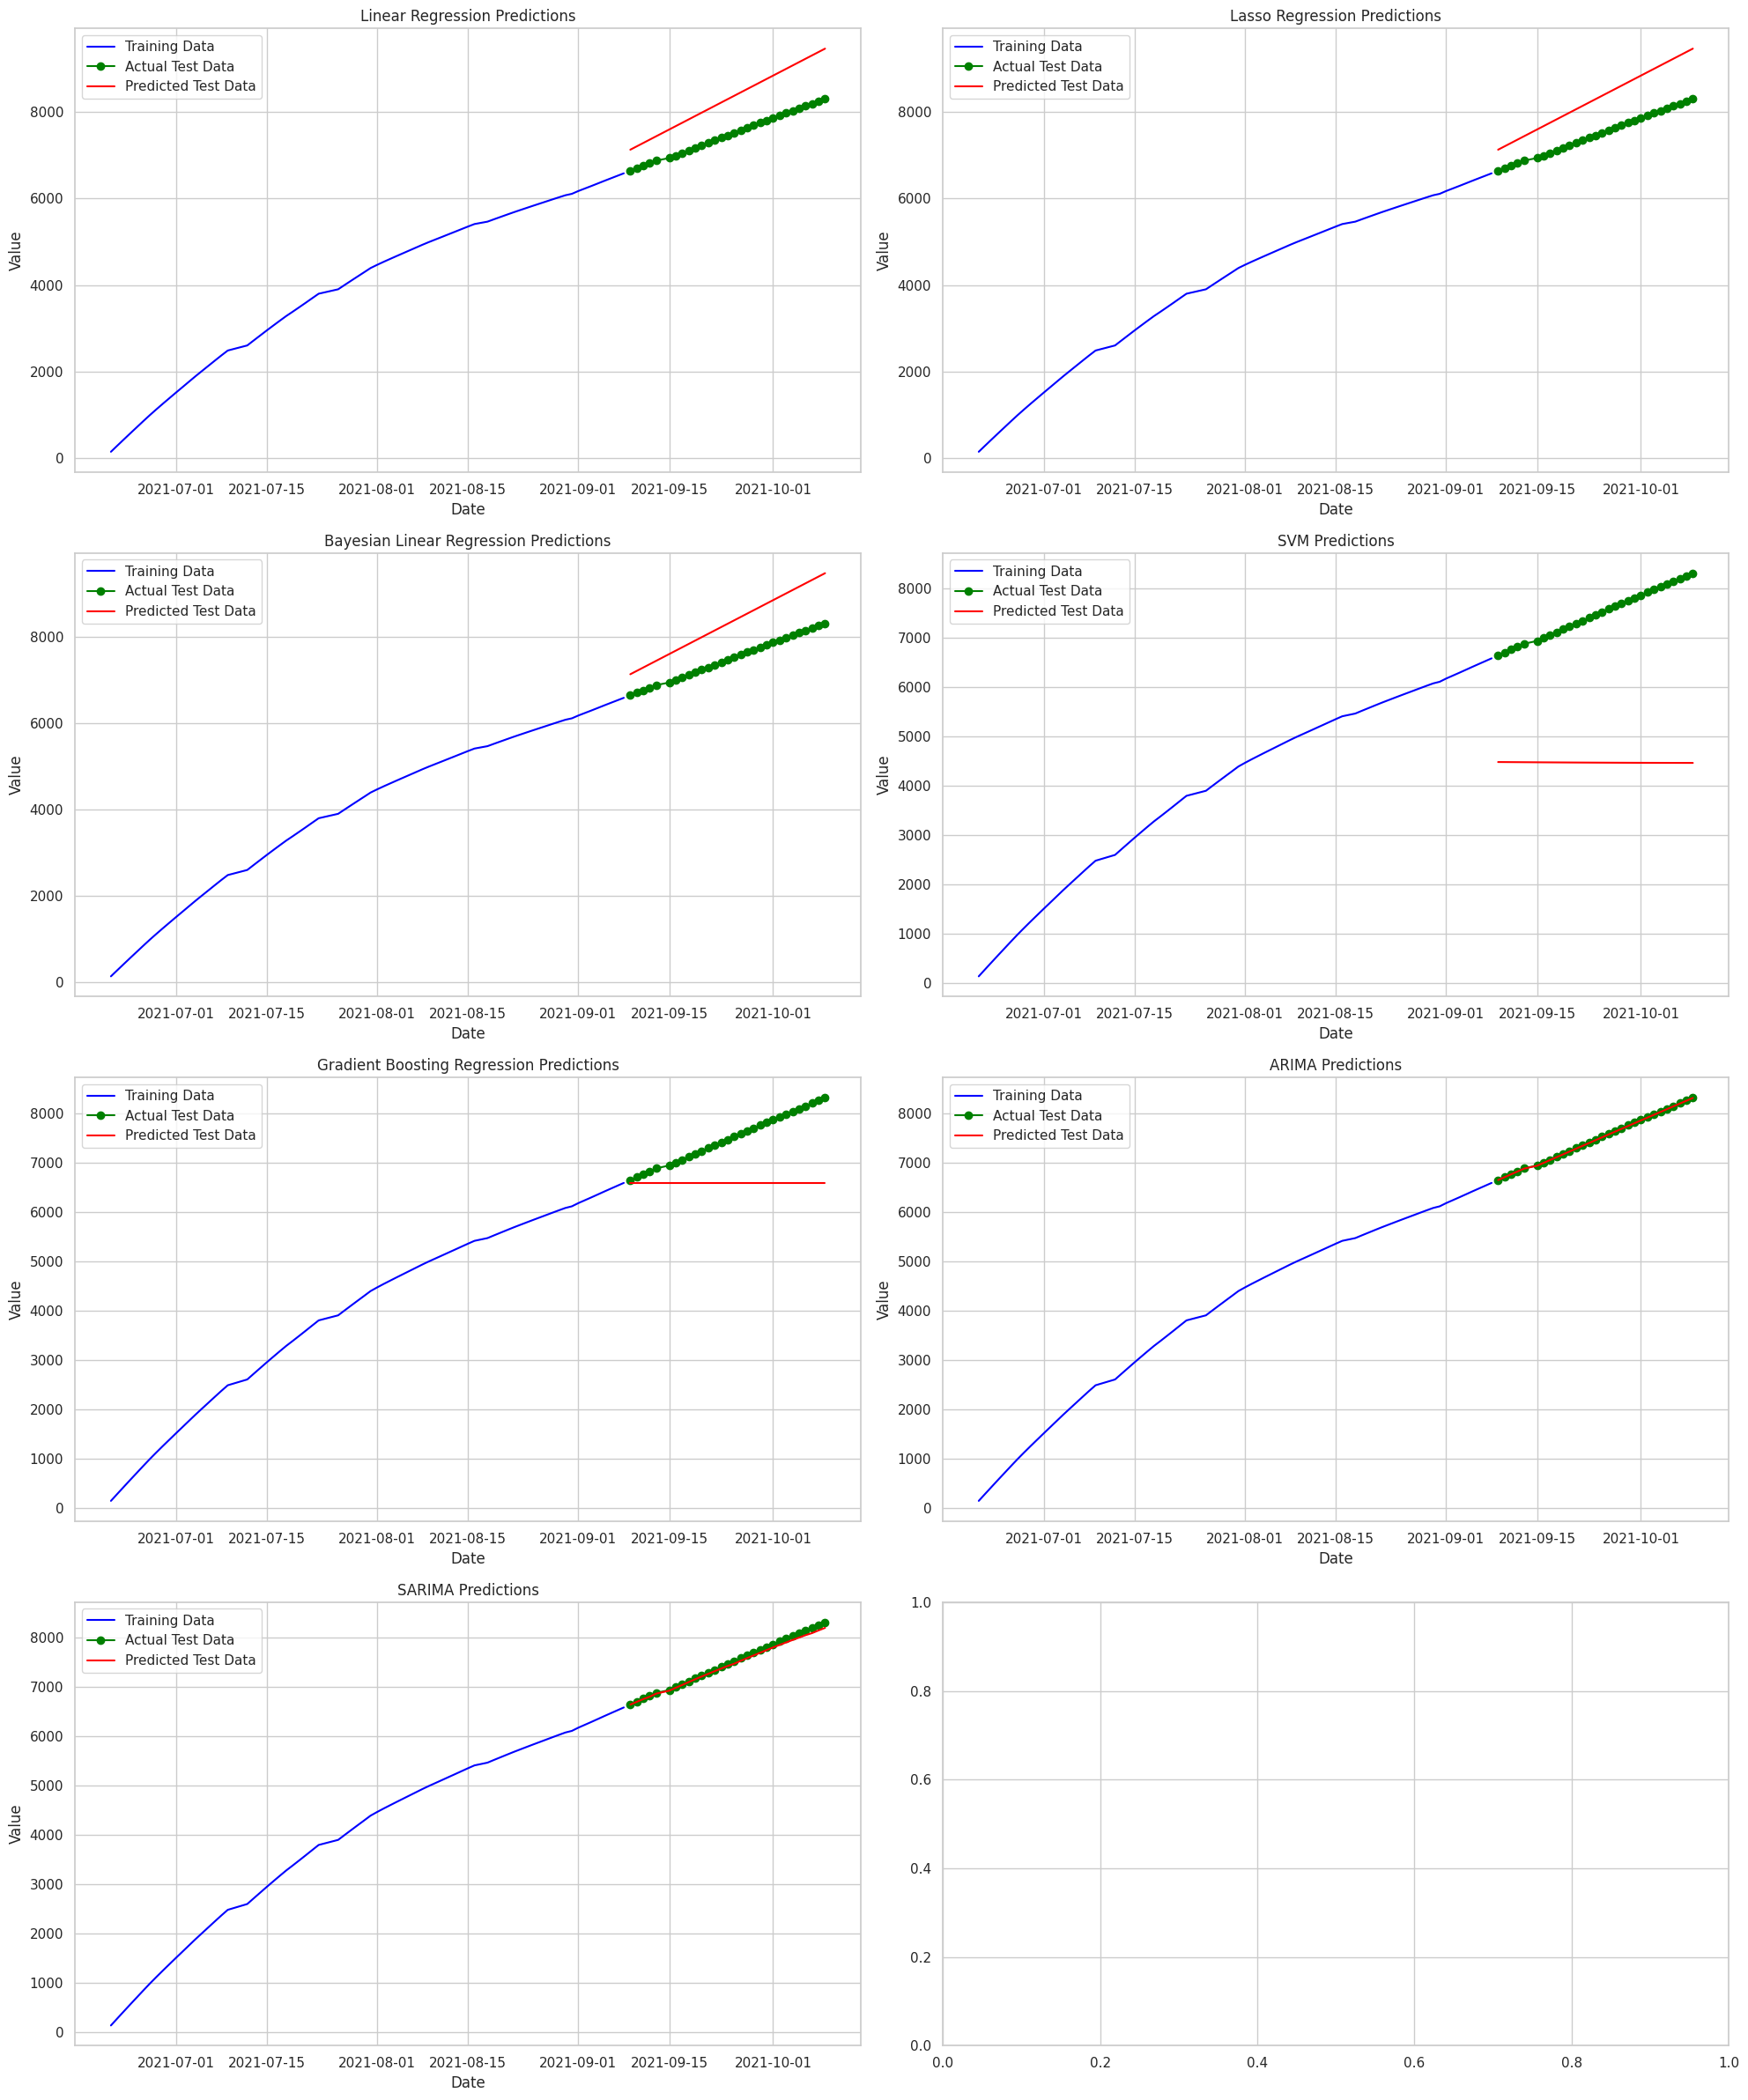

In [ ]:
warnings.filterwarnings('ignore')
test_model(cum, 'cum_cost')

## Cost Prediction

The result of the campaign total cost for 31.10.2021 is 9876.12

In [ ]:
from pandas import date_range

model = ARIMA(cum['cum_cost'], order=(1,1,1))
model_fit = model.fit()
start_date = pd.to_datetime("2021-10-09", format='%Y-%m-%d')
end_date = pd.to_datetime("2021-10-31", format='%Y-%m-%d')
pred_range = (start_date - cum.index[0]).days, (end_date - cum.index[0]).days
predictions_cost = model_fit.predict(start=pred_range[0], end=pred_range[1])
print(round(predictions_cost.values[-1],2))

9876.12


## Conversions predictor

In this section for predicting the conversions number of the campaign basic SARIMA $(1,1,1)\space (1,1,1,12)$ showed the best results on RMSE and MAE metrics. Further finetuning results are expected to be even better, although overfitting cannot be predicted on the single test set, therefore basic model is chosen to be trained on the whole data and predict the number of conversions.

Linear Regression
Linear Regression RMSE: 12.74
Linear Regression MAE: 10.62
Lasso Regression
Lasso Regression RMSE: 12.83
Lasso Regression MAE: 10.71
Bayesian Linear Regression
Bayesian Linear Regression RMSE: 12.77
Bayesian Linear Regression MAE: 10.65
SVM
SVM RMSE: 205.82
SVM MAE: 201.65
Gradient Boosting Regression
Gradient Boosting Regression RMSE: 66.49
Gradient Boosting Regression MAE: 55.95
ARIMA
ARIMA RMSE: 6.06
ARIMA MAE: 5.42
SARIMA
SARIMA RMSE: 6.69
SARIMA MAE: 5.18


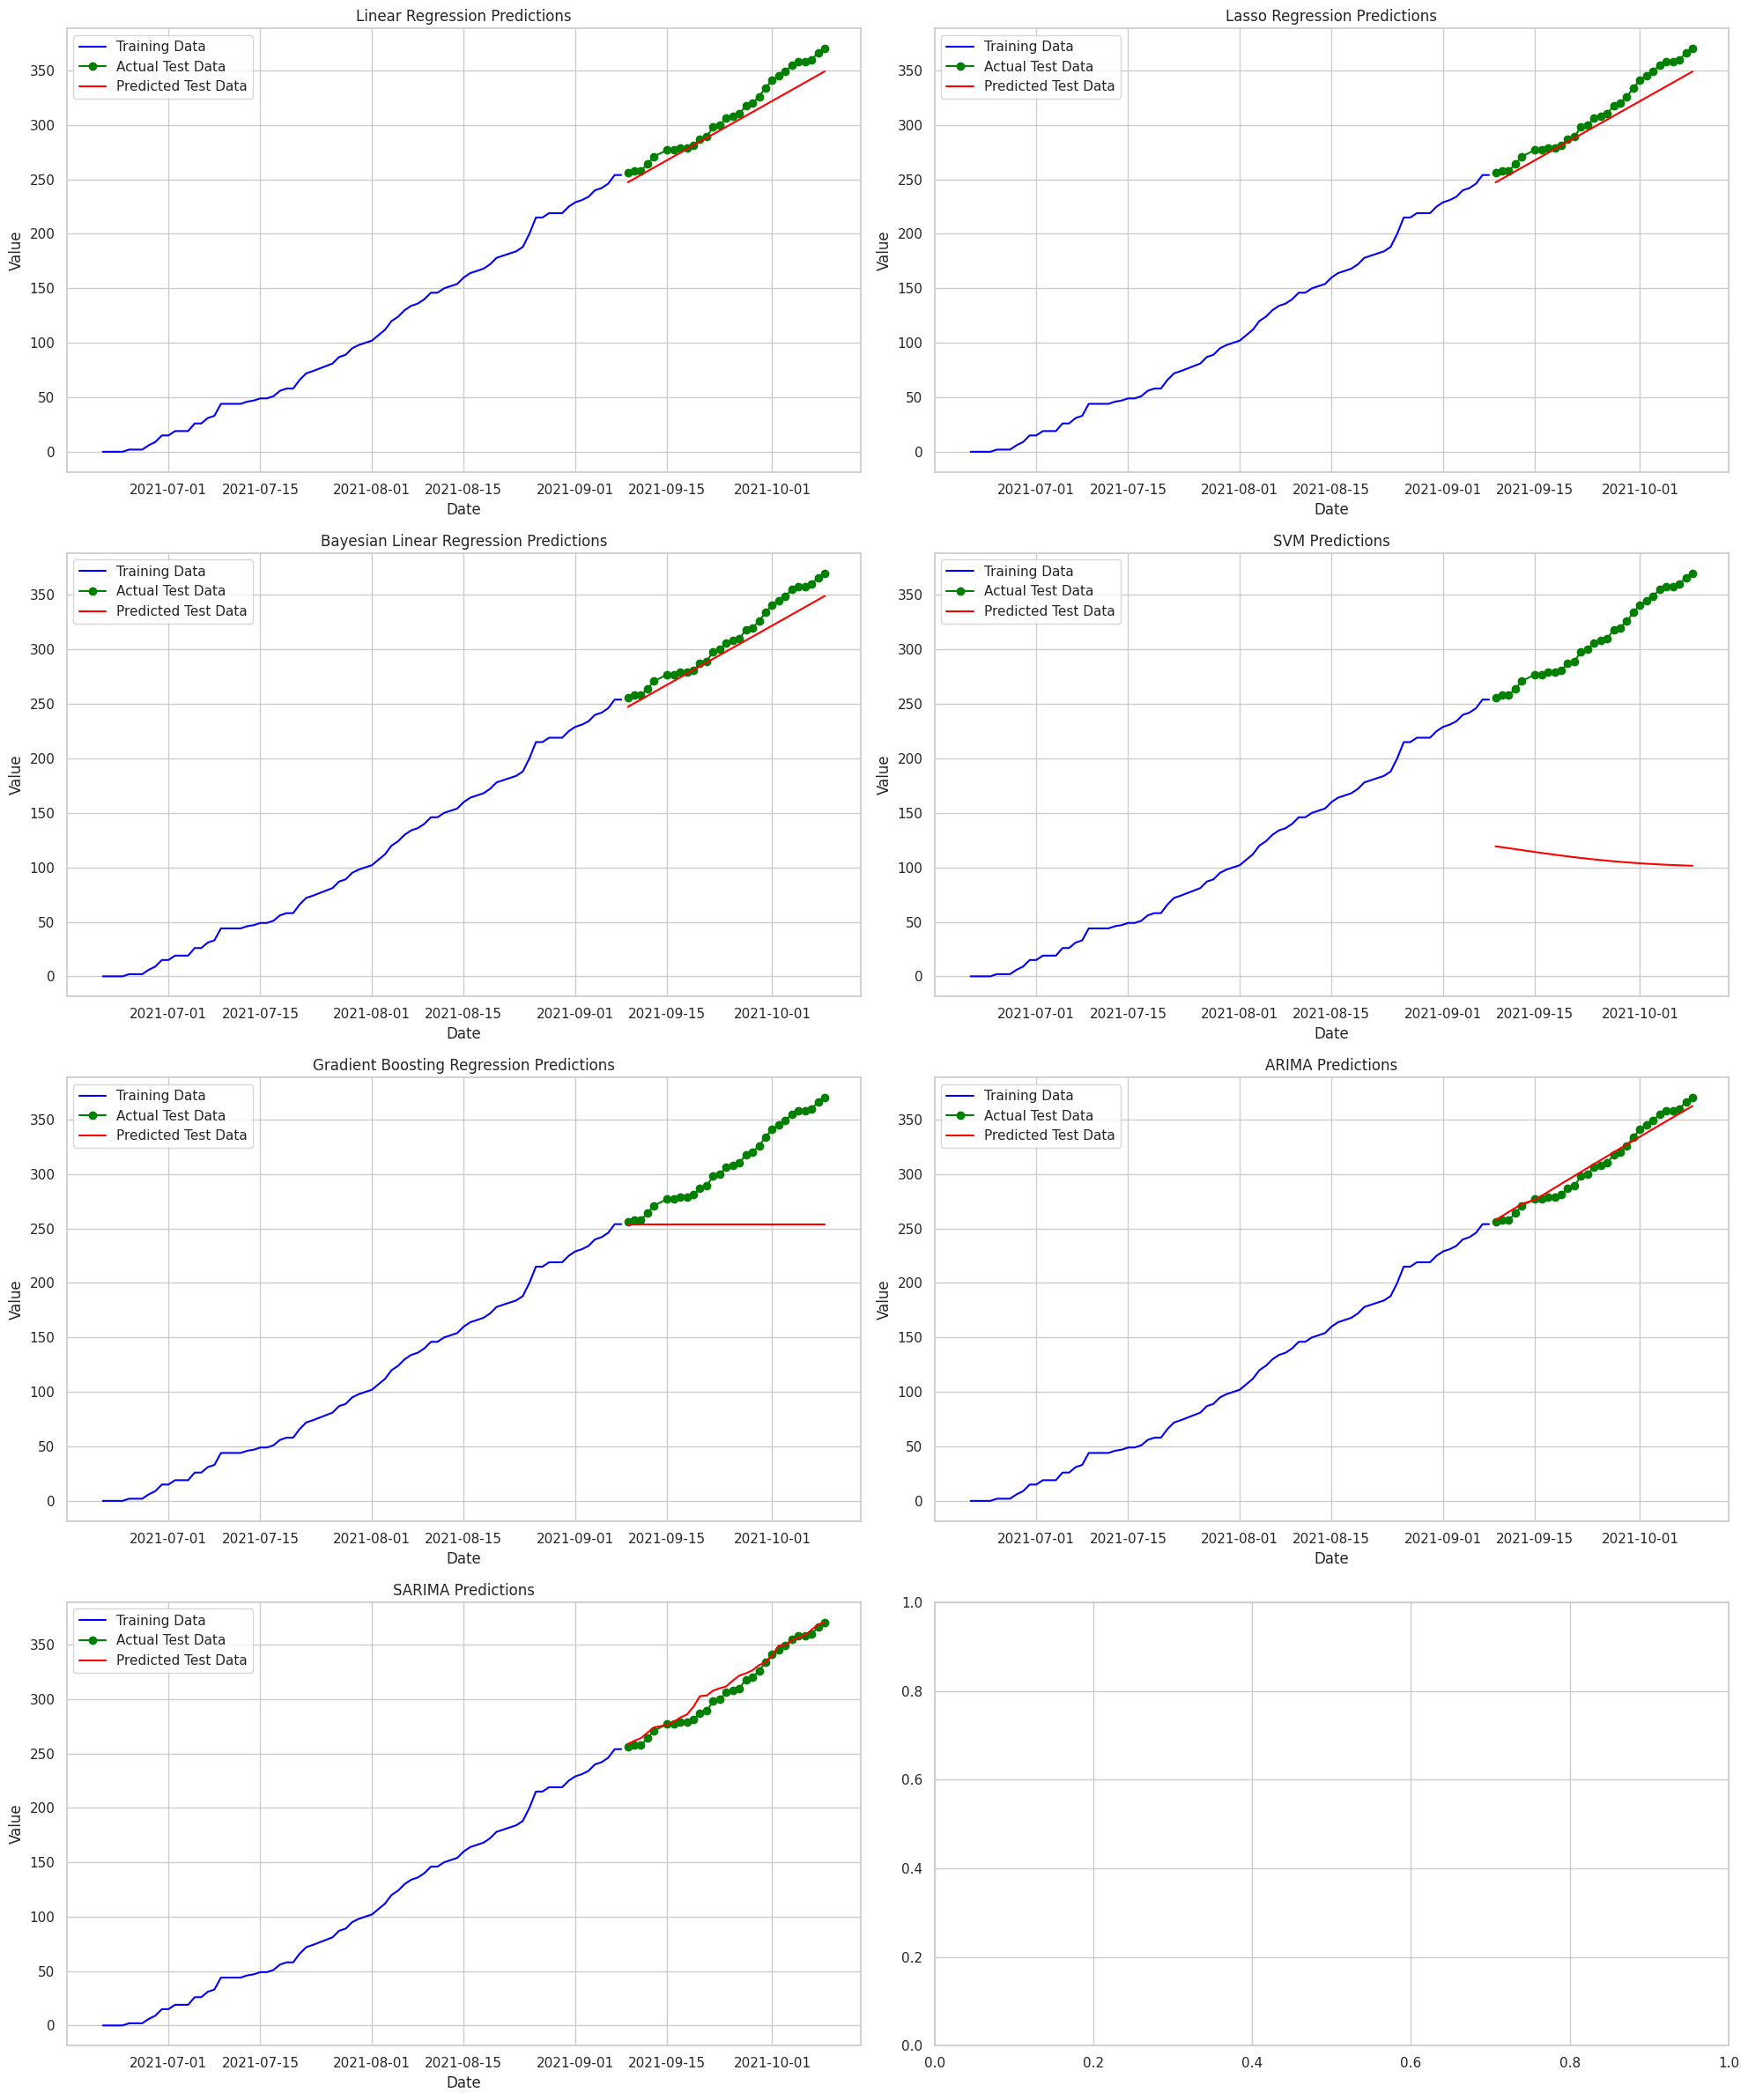

In [ ]:
test_model(cum, 'cum_conv')

## Conversion number Prediction

The result of the campaign total conversions for 31.10.2021 is 476

In [ ]:
model = ARIMA(cum['cum_conv'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
start_date = pd.to_datetime("2021-10-09", format='%Y-%m-%d')
end_date = pd.to_datetime("2021-10-31", format='%Y-%m-%d')
pred_range = (start_date - cum.index[0]).days, (end_date - cum.index[0]).days
predictions_conv = model_fit.predict(start=pred_range[0], end=pred_range[1])
print(round(predictions_conv.values[-1],0))

476.0


## CPA Predictor

In this section for predicting the CPA of the campaign basic Gradient Boosting showed the best results on RMSE and MAE metrics. Further finetuning results are expected to be even better, although overfitting cannot be predicted on the single test set, therefore basic model is chosen to be trained on the whole data and predict CPA.

Linear Regression
Linear Regression RMSE: 75.08
Linear Regression MAE: 72.93
Lasso Regression
Lasso Regression RMSE: 74.97
Lasso Regression MAE: 72.82
Bayesian Linear Regression
Bayesian Linear Regression RMSE: 71.91
Bayesian Linear Regression MAE: 69.79
SVM
SVM RMSE: 15.51
SVM MAE: 14.77
Gradient Boosting Regression
Gradient Boosting Regression RMSE: 2.05
Gradient Boosting Regression MAE: 1.67
ARIMA
ARIMA RMSE: 2.14
ARIMA MAE: 1.76
SARIMA
SARIMA RMSE: 24.33
SARIMA MAE: 24.30


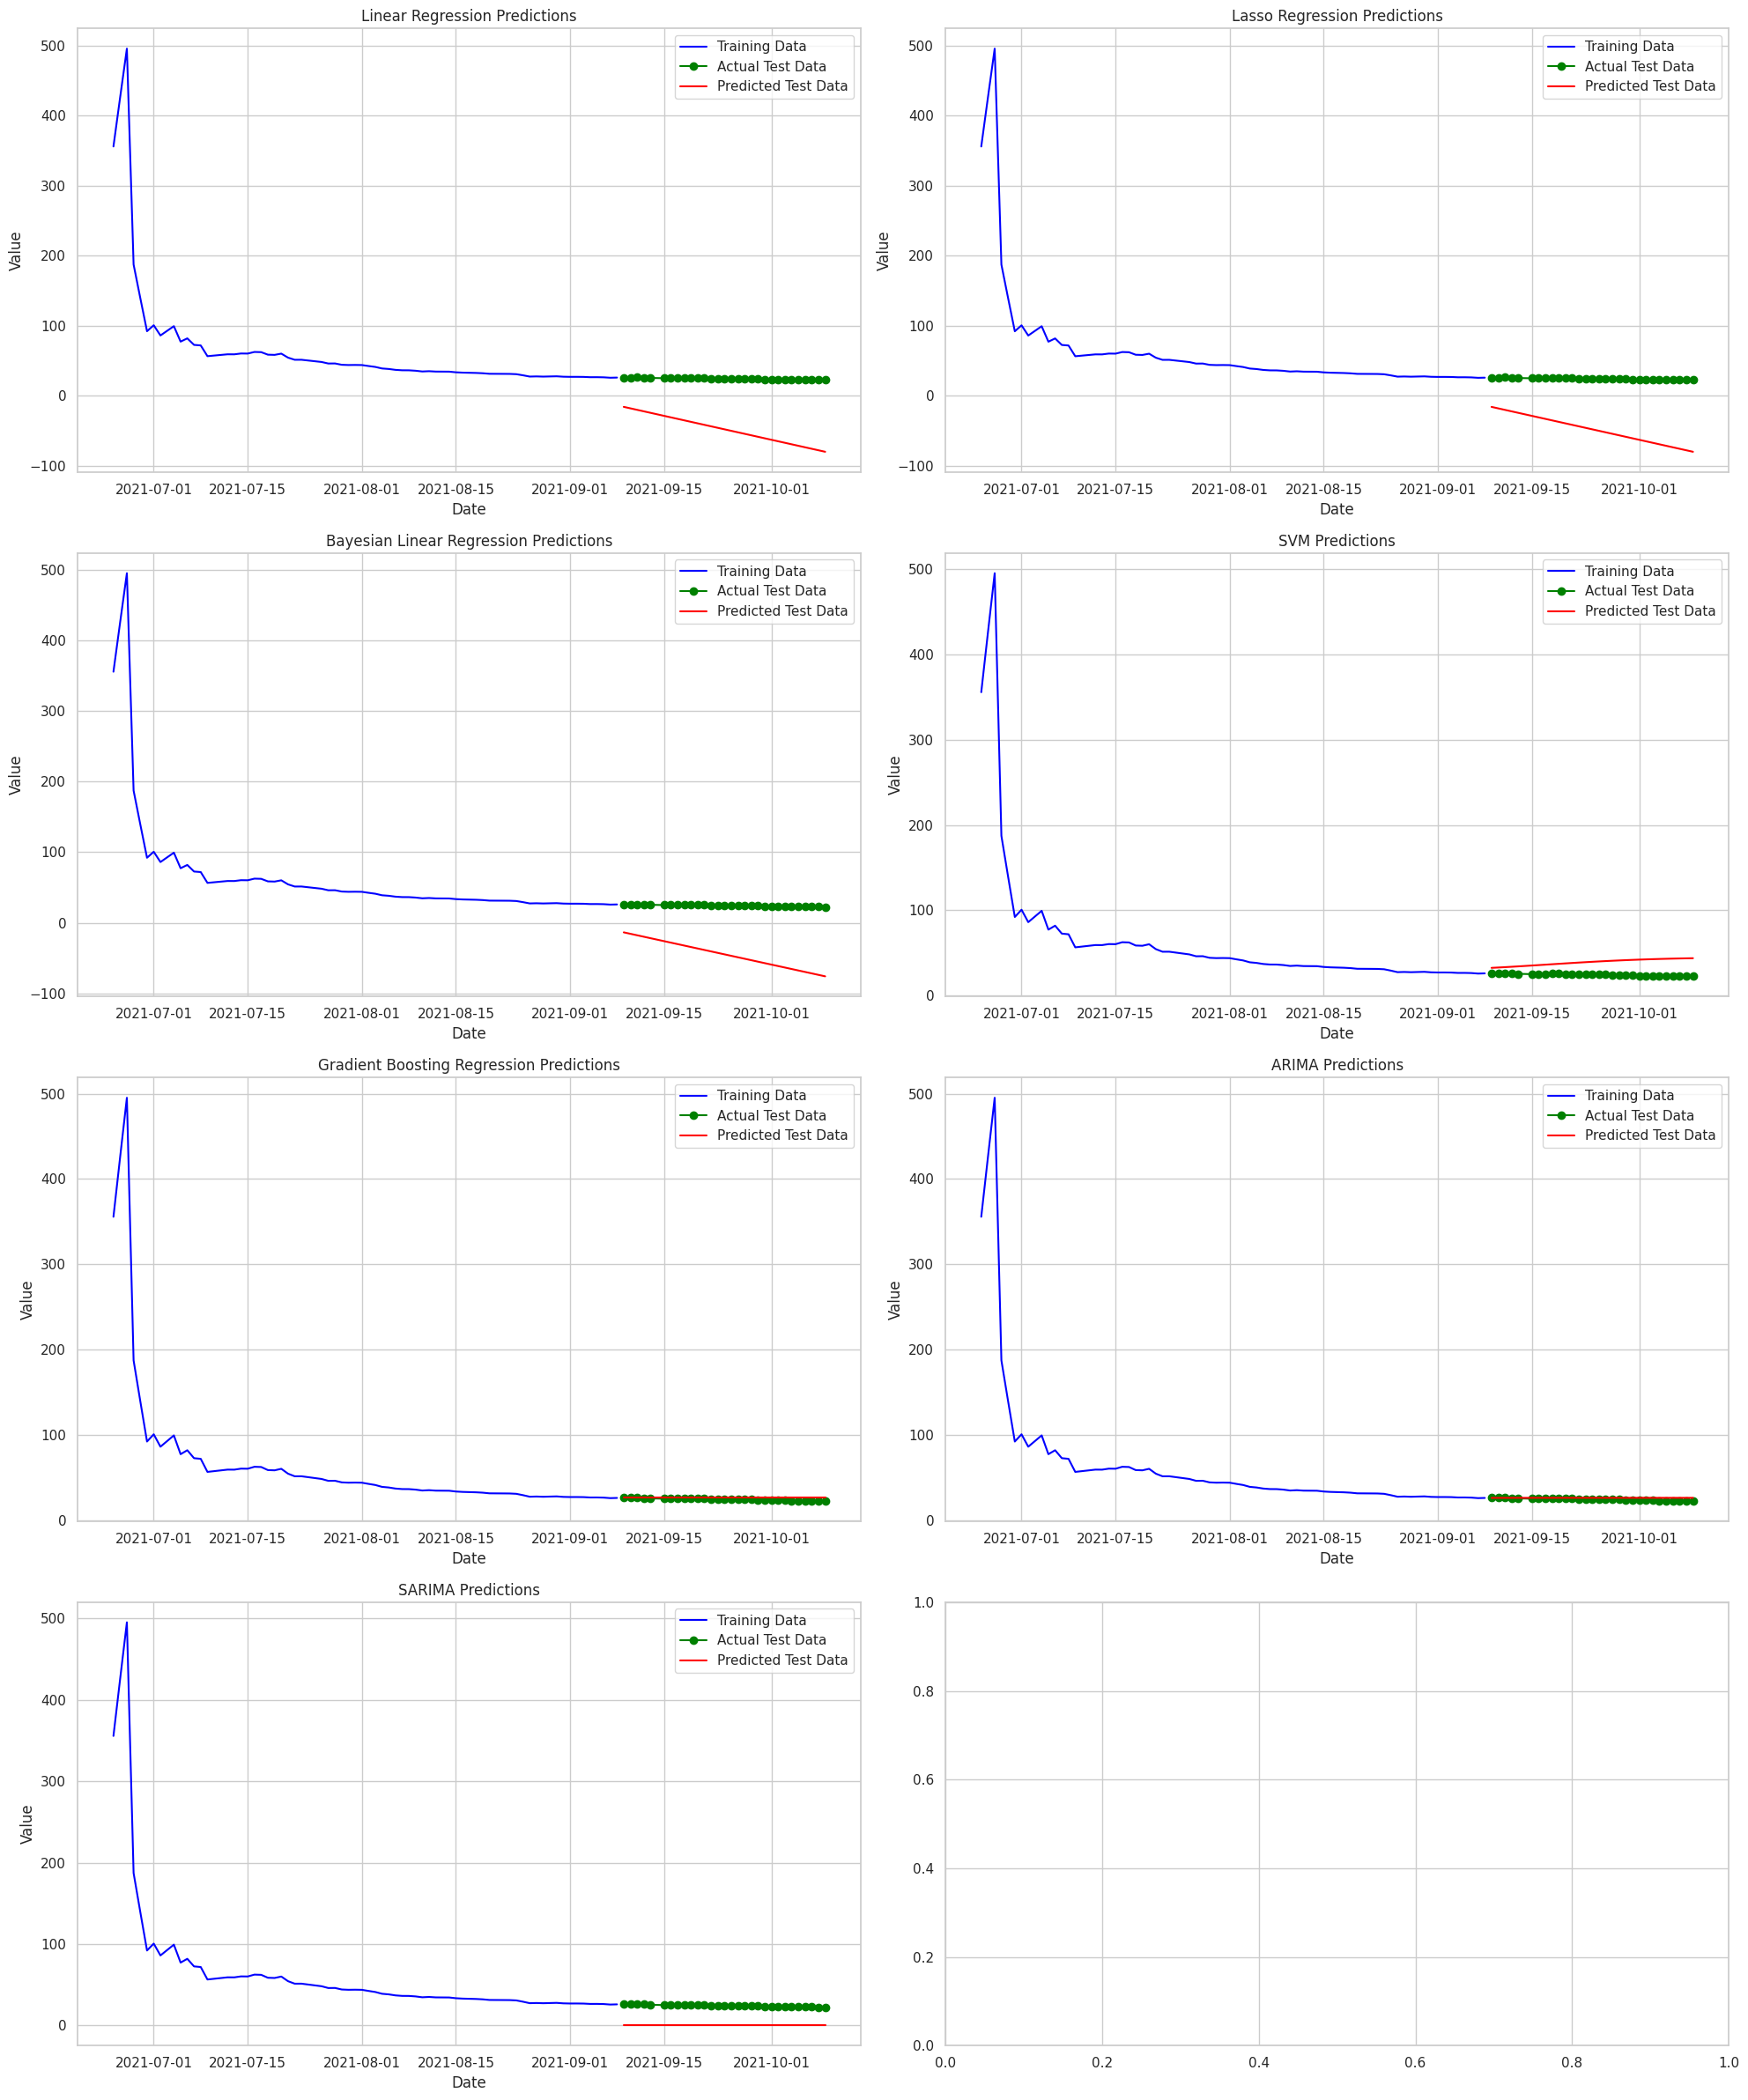

In [ ]:
test_model(cum[4:], 'CPA')

## CPA Prediction

The result of the campaign CPA on 31.10.2021 is 16

In [ ]:
model = ARIMA(cum['CPA'][4:], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
start_date = pd.to_datetime("2021-10-09", format='%Y-%m-%d')
end_date = pd.to_datetime("2021-10-31", format='%Y-%m-%d')
pred_range = (start_date - cum.index[0]).days, (end_date - cum.index[0]).days
predictions_CPA = model_fit.predict(start=pred_range[0], end=pred_range[1])
print(round(predictions_CPA.values[-1],0))

16.0


## Overall result
All of the predictions made are stored in the following DataFrame.


Comment: since cost, conversion and CPA were predicted seperately predicted costs divided by predicted conversions would make another predicted CPA, although the new one would contain mistakes of both predictions rather than a single one in the case of predicted CPA.

In [ ]:
dates = pd.date_range(start='2021-10-09', end='2021-10-31')
result = pd.DataFrame({'Day': dates,
                       'Cost': predictions_cost,
                       'Conversions': predictions_conv,
                       'CPA': predictions_CPA})
result.tail()

,Day,Cost,Conversions,CPA
128,2021-10-27,9653.998152,461.321036,17.060830
129,2021-10-28,9709.573767,463.356838,16.972231
130,2021-10-29,9765.119088,467.576049,16.545096
131,2021-10-30,9820.634133,470.962867,16.205347
132,2021-10-31,9876.118918,475.831509,16.041177


P.S. Thank you for this task. It was interesting enough and helpful to refresh the knowledge about working with time in python.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('/content/drive/MyDrive/Colab Notebooks/Копия блокнота "Ad.Campaign"')

--2023-11-02 11:54:21--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2023-11-02 11:54:21 (32.9 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





E: Unable to locate package texlive-generic-recommended
[NbConvertApp] WARNING | pattern '$notebookpath$file_name' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for som

'File Download Unsuccessful. Saved in Google Drive'